In [95]:
logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Middleware part

In [17]:
mw=1
path_to_experiment=path_to_experiment="/home/anastasiia/final_ex/final_copy/"
path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware1_logs/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif (j == 8 or j == 32) and lines[i + j] != "DEBUG ethz.Middleware: CLIENT DISCONNECTED":
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call") or lines[i].startswith("DEBUG ethz.Middleware: CLIENT DISCONNECTED") :
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs+"log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()
#print(new_experiment_positions)
#print("\n")
#print(new_experiment_positions_end)
#print([[a, b] for a, b in zip(new_experiment_positions, new_experiment_positions_end)])
j = 0
for i in new_experiment_positions:
    print(j)
    print(i)
    print(lines[i])
    j += 1

line numer=176028
condition not ok
line numer=176033
condition not ok
line numer=269212
condition not ok
line numer=269215
condition not ok
line numer=269218
condition not ok


In [106]:
#### v1
#ex1
#log1 log2 log3 log4 |w1|
#log5 log6 log7 log8 |w2|
#log9 log10 log11 log12 |w3|
#
#log13 log14 log15 log16 |w1|
#log17 log18 log19 log20 |w2|
#log21 log22 log23 log24 |w3|
#
#log25 log26 log27 log28 |w1|
#log29 log30 log31 log32 |w2|
#log33 log34 log35 log36 |w3|
#
#log37 log38 log39 log40 |w1|
#log41 log42 log43 log44 |w2|5534
#log45 log46 log47 log48 |w3|

path_to_logs = "/home/anastasiia/final_ex/final_copy/middleware1_logs/"

logs_per_experiment = 36

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

data=[]
k = 36
l = 0
for v in value_sizes:
    print("k="+str(k))
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs+"log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment * 3
        
global_data_4 = pd.DataFrame(columns=['Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

print("Start adding data to global table")
k = 0
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print("m="+str(m))
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_4.loc[k] = newline
                    k += 1
                m += 1    


k=36
k=180
k=324
k=468
Start adding data to global table
m=0
m=1
m=2
m=3
m=4
m=5
m=6
m=7
m=8
m=9
m=10
m=11
m=12
m=13
m=14
m=15
m=16
m=17
m=18
m=19
m=20
m=21
m=22
m=23
m=24
m=25
m=26
m=27
m=28
m=29
m=30
m=31
m=32
m=33
m=34
m=35
m=36
m=37
m=38
m=39
m=40
m=41
m=42
m=43
m=44
m=45
m=46
m=47
m=48
m=49
m=50
m=51
m=52
m=53
m=54
m=55
m=56
m=57
m=58
m=59
m=60
m=61
m=62
m=63
m=64
m=65
m=66
m=67
m=68
m=69
m=70
m=71
m=72
m=73
m=74
m=75
m=76
m=77
m=78
m=79
m=80
m=81
m=82
m=83
m=84
m=85
m=86
m=87
m=88
m=89
m=90
m=91
m=92
m=93
m=94
m=95
m=96
m=97
m=98
m=99
m=100
m=101
m=102
m=103
m=104
m=105
m=106
m=107
m=108
m=109
m=110
m=111
m=112
m=113
m=114
m=115
m=116
m=117
m=118
m=119
m=120
m=121
m=122
m=123
m=124
m=125
m=126
m=127
m=128
m=129
m=130
m=131
m=132
m=133
m=134
m=135
m=136
m=137
m=138
m=139
m=140
m=141
m=142
m=143


In [6]:
global_data_4.to_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_4.pkl")

In [53]:
global_data_4 = pd.read_pickle("/home/anastasiia/experiment_1/fourth_copy/global_data_4.pkl")

Start drawing graphs


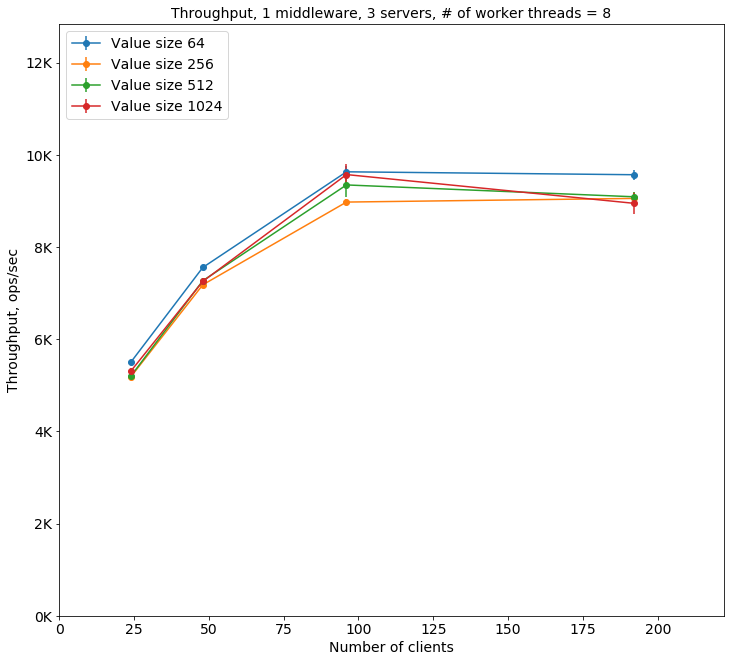

[[5503.717948717949, 7555.348717948717, 9630.661538461538, 9567.276923076923], [5187.164102564103, 7179.184615384615, 8974.11282051282, 9053.64065934066], [5201.928205128205, 7267.087179487179, 9345.71794871795, 9088.87728937729], [5309.323076923077, 7253.210256410257, 9570.548717948719, 8947.22564102564]]


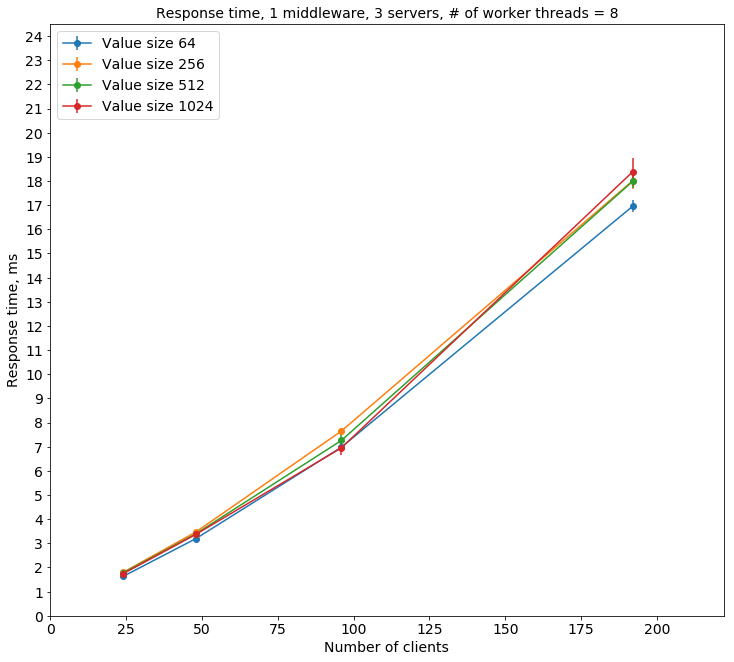

[[1.6271657853665353, 3.1908859948428456, 6.979627567720406, 16.955484479950087], [1.7942682973849648, 3.4652781795804253, 7.647118892403905, 18.008395774430767], [1.7714693565305173, 3.390649235541768, 7.25822548651103, 17.987799806363597], [1.737420773134438, 3.3664845840144344, 6.9516609984584115, 18.381374200511374]]


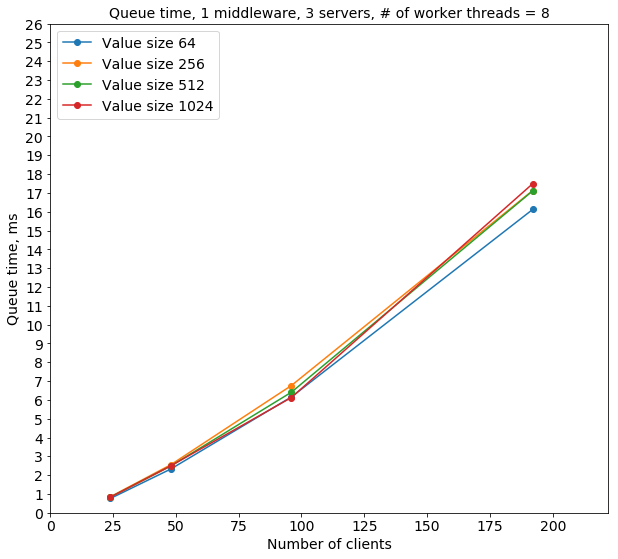

[[0.7626052318945234, 2.3244806022970312, 6.155456477415349, 16.120311274702928], [0.8527934338905603, 2.552368278377446, 6.762544915517682, 17.12560896300721], [0.8365606047461691, 2.4833594668480723, 6.407739181251252, 17.108707587026363], [0.829672622324735, 2.493157406517079, 6.126303611989131, 17.48831868237053]]


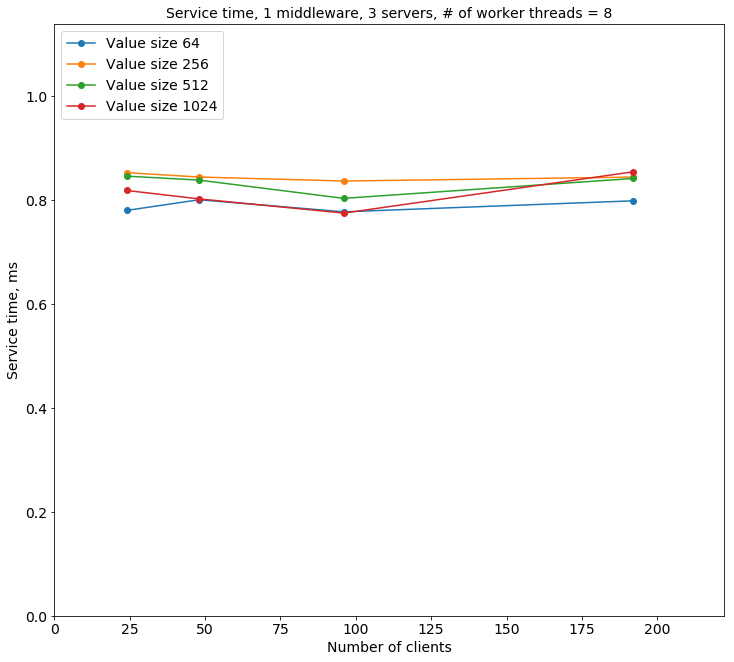

[[0.7794097230310513, 0.7998972370058094, 0.7766833388445771, 0.7978547602699156], [0.8520311973243617, 0.8435884083686384, 0.8359189280620267, 0.8434750273366858], [0.8453108117699946, 0.8376600648374618, 0.8025828365108936, 0.8408424283765349], [0.8177506814331442, 0.801556304688428, 0.7742604582327086, 0.8536541050685243]]


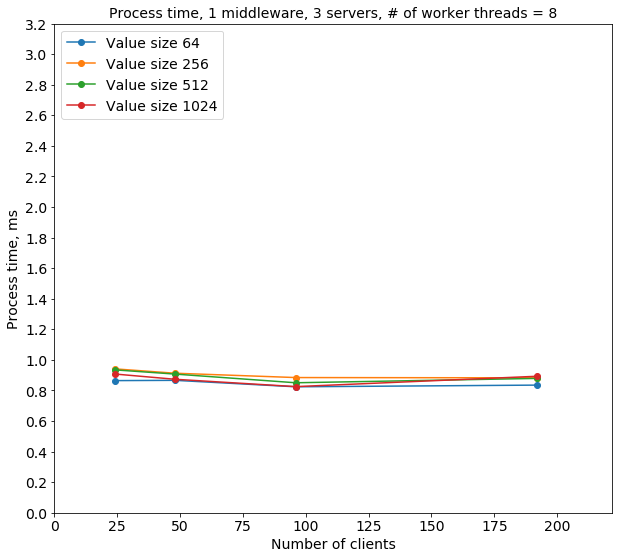

[[0.8645605534720118, 0.8664053925458141, 0.8241710903050566, 0.8351732052471592], [0.9414748634944048, 0.9129099012029792, 0.8845739768862231, 0.8827868114235575], [0.9349087517843482, 0.9072897686936959, 0.850486305259779, 0.8790922193372355], [0.9077481508097028, 0.8733271774973558, 0.8253573864692806, 0.8930555181408476]]


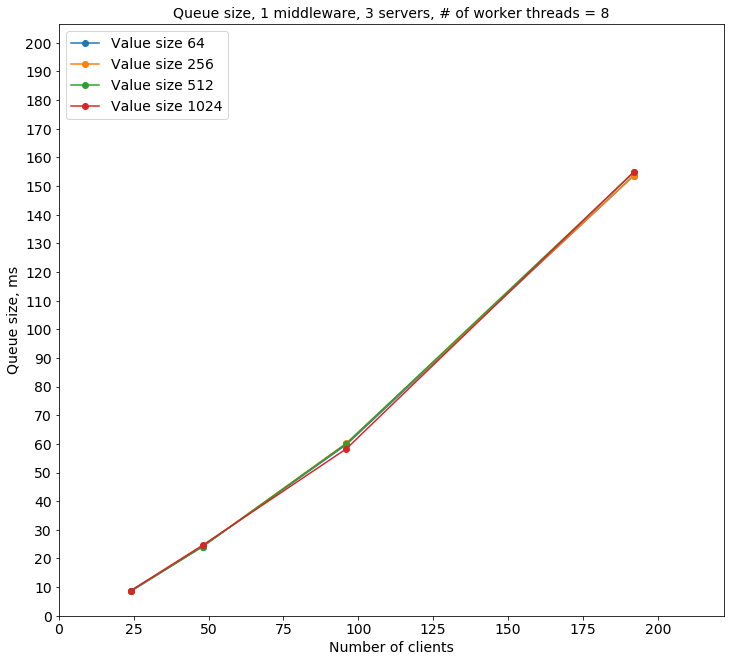

[[8.494555195788395, 24.14993487378274, 59.75149136385445, 153.6578883469776], [8.678082090208868, 24.23645996509853, 60.222752395494275, 153.62626067843604], [8.67664160035332, 24.170817214529578, 60.081996691203706, 154.74341471196584], [8.768792776712083, 24.610399921944378, 58.289800386549125, 154.95681113583984]]


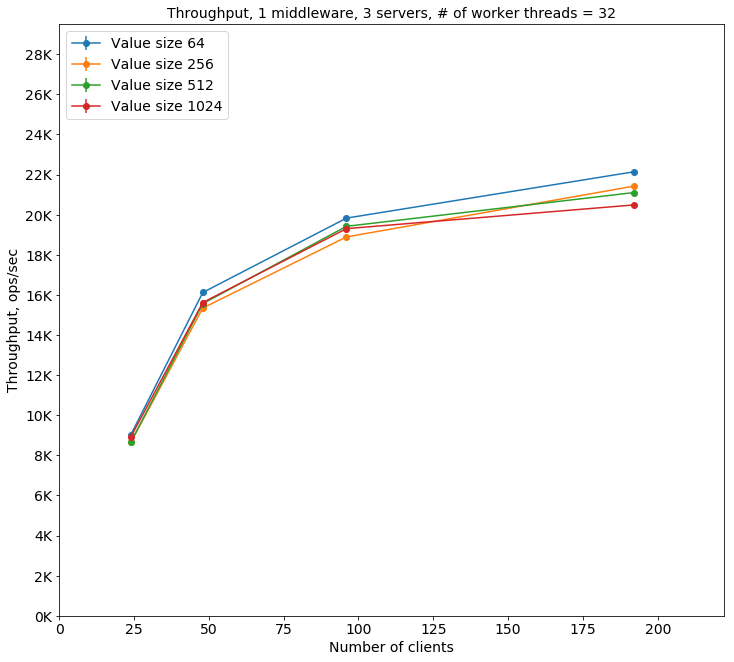

[[9035.88717948718, 16120.497435897438, 19829.779487179487, 22138.6717948718], [8653.153846153846, 15346.123076923075, 18890.96923076923, 21423.112820512823], [8670.882051282051, 15564.846153846154, 19420.36923076923, 21103.266666666666], [8933.107692307693, 15620.989743589744, 19305.0, 20486.533333333333]]


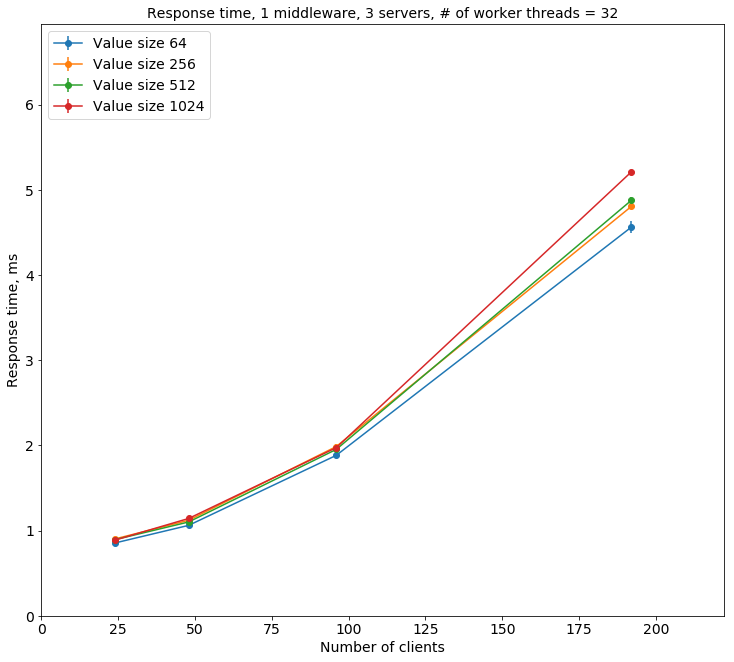

[[0.8545123206723277, 1.0612073114750864, 1.8828733888192504, 4.561733835745364], [0.9019222278523022, 1.1210164498241266, 1.9862058631189667, 4.804780219398794], [0.8932507383982464, 1.1012225116098242, 1.9523582429444948, 4.876439593627138], [0.8880132448810418, 1.142225138891032, 1.973040330989049, 5.210299749128509]]


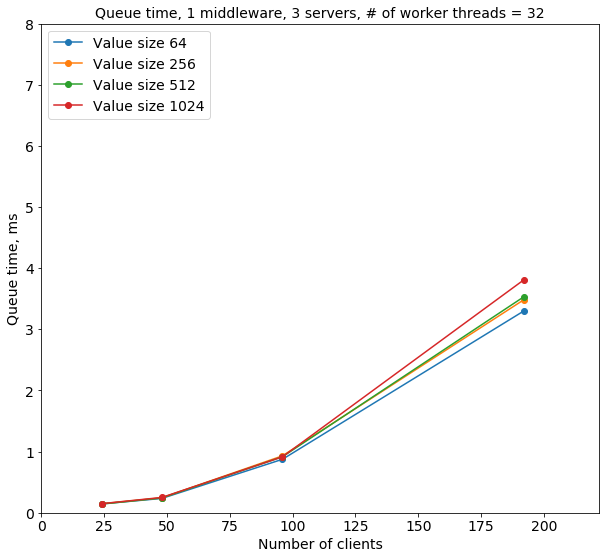

[[0.14546270767617217, 0.2350414204308132, 0.8753144390190666, 3.300124552905566], [0.1477848598258231, 0.24538662399991445, 0.9317657955680355, 3.483268609723455], [0.14279386002784444, 0.24299860467951284, 0.9168861031980168, 3.531947053038574], [0.1489452087193936, 0.25093422951958455, 0.9159311723414287, 3.808650785982236]]


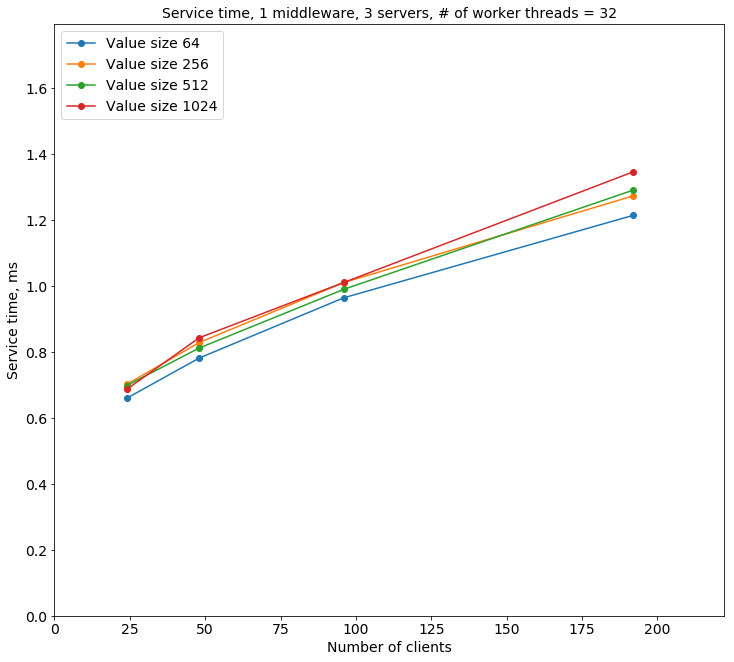

[[0.6596046079507468, 0.7812439458348457, 0.9641187160362542, 1.21394167903432], [0.7017290272110658, 0.8283331562235379, 1.0103207637674656, 1.2730417926289532], [0.6980793957022088, 0.8116979584171432, 0.9897522347669853, 1.2904576445450056], [0.6866746347209689, 0.8427818848603769, 1.0105047848637594, 1.3459455792598212]]


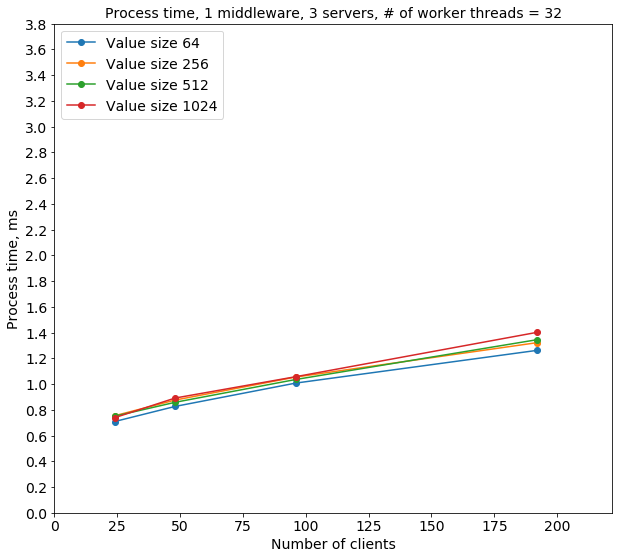

[[0.7090496129961555, 0.8261658910442733, 1.007558949800184, 1.261609282839797], [0.7541373680264791, 0.8756298258242121, 1.0544400675509313, 1.3215116096753399], [0.750456878370402, 0.8582239069303114, 1.0354721397464781, 1.3444925405885637], [0.7390680361616481, 0.8912909093714473, 1.0571091586476202, 1.4016489631462719]]


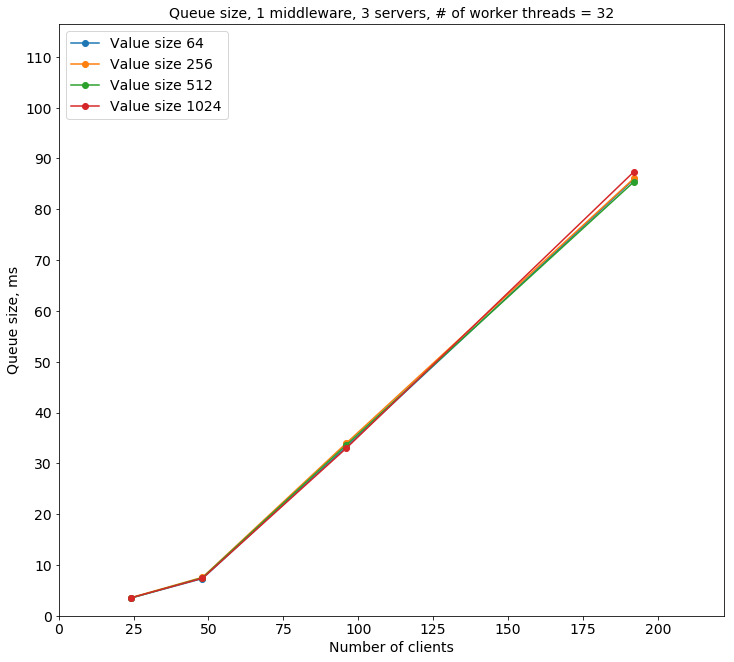

[[3.485633922399458, 7.340208054914638, 33.235835664929745, 85.90913359405202], [3.5481765948683304, 7.577085200504997, 33.970188441689274, 86.0628379557473], [3.4741403885210858, 7.487269306738229, 33.61860108815169, 85.39716320501603], [3.525638420258606, 7.384938017322518, 32.97337742978769, 87.38006029727096]]


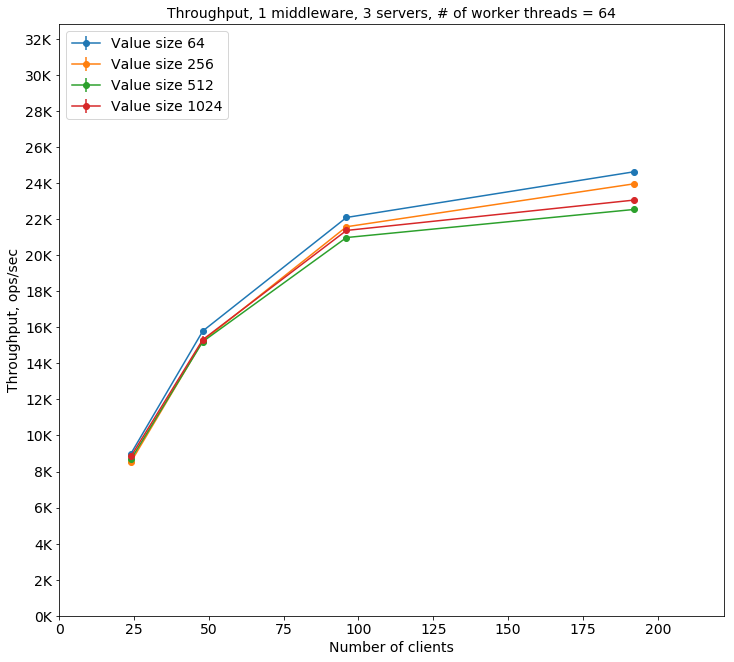

[[8992.056410256411, 15791.384615384617, 22087.75384615384, 24620.035897435897], [8526.476923076923, 15244.697435897435, 21573.56923076923, 23952.14871794872], [8674.676923076922, 15203.533333333331, 20974.71282051282, 22531.117948717947], [8836.420512820512, 15313.087179487184, 21368.767032967033, 23050.953846153847]]


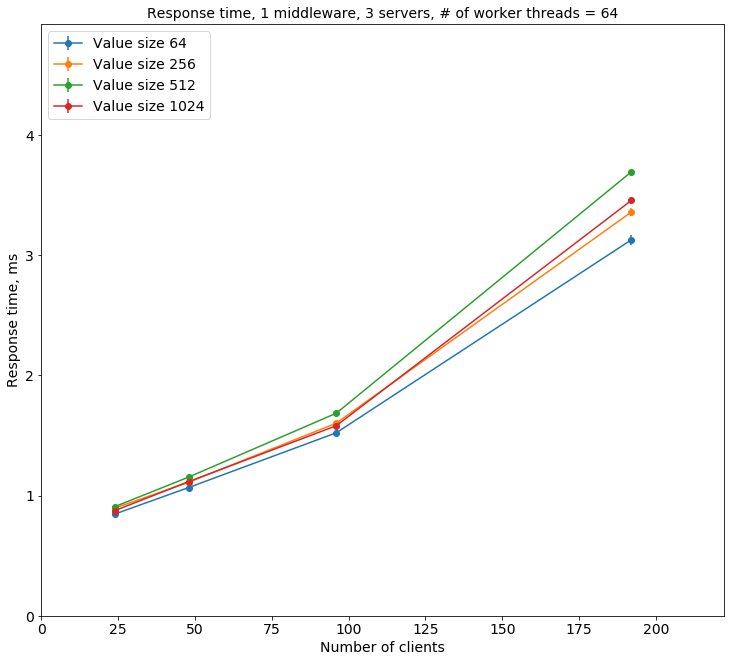

[[0.8462380756576603, 1.0665646961017368, 1.5215144161563479, 3.126799581829017], [0.8955633222126191, 1.1106449455649312, 1.601536400429205, 3.357697580368037], [0.9077207929712301, 1.153483552574992, 1.6842588719163418, 3.691712066366106], [0.8744334345848359, 1.1157551844375115, 1.580355521653267, 3.4540531834046133]]


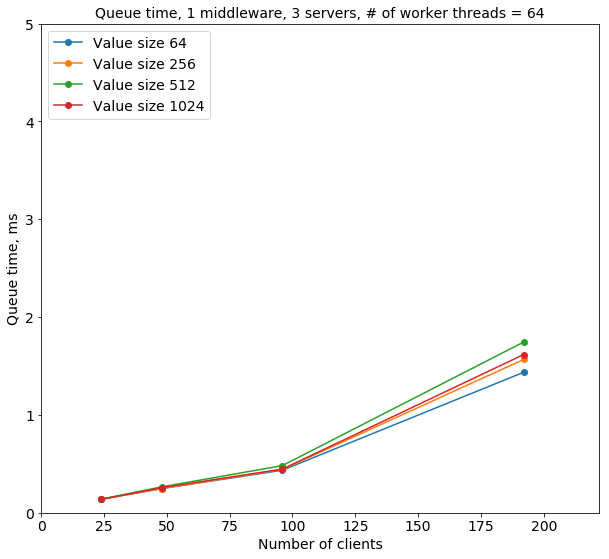

[[0.1384469825504106, 0.24776249301793904, 0.43512334947407916, 1.436326094215114], [0.13884593570675477, 0.24797155194105325, 0.44371174984774814, 1.566934629707222], [0.13994343689442068, 0.26492424669164283, 0.4822664360919095, 1.7451667983743508], [0.13809977586933334, 0.25691515084131156, 0.4464812856247017, 1.6173881007427025]]


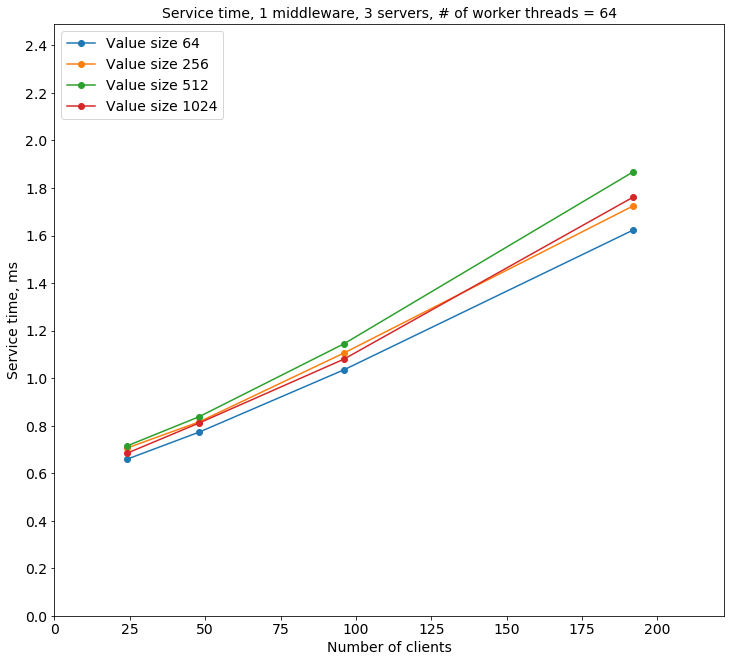

[[0.6585493407001393, 0.7727823025862853, 1.0347232670058266, 1.6231282963823295], [0.70551398569644, 0.8159215343813535, 1.105356602071956, 1.7247698348994545], [0.7143314877018992, 0.8376457024665994, 1.144168472463423, 1.8680015877755844], [0.6836025957836507, 0.8111328938678898, 1.0797076083599302, 1.7616831474352472]]


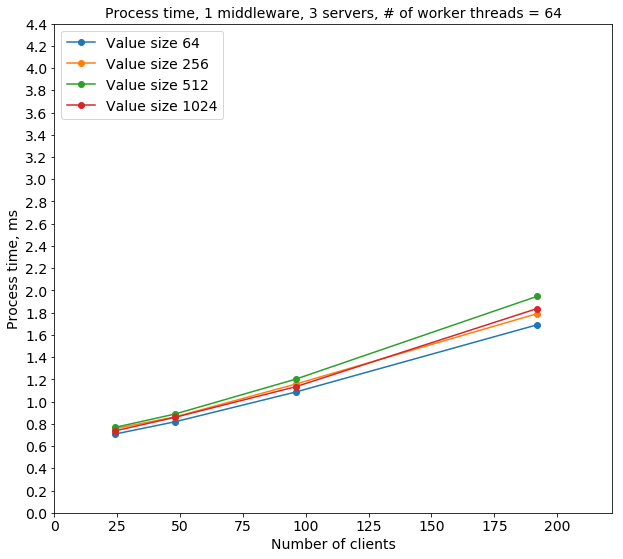

[[0.7077910931072497, 0.8188022030837977, 1.086391066682269, 1.690473487613903], [0.7567173865058644, 0.8626733936238778, 1.157824650581457, 1.7907629506608154], [0.7677773560768094, 0.888559305883349, 1.2019924358244325, 1.946545267991755], [0.7363336587155026, 0.8588400335962, 1.1338742360285654, 1.836665082661911]]


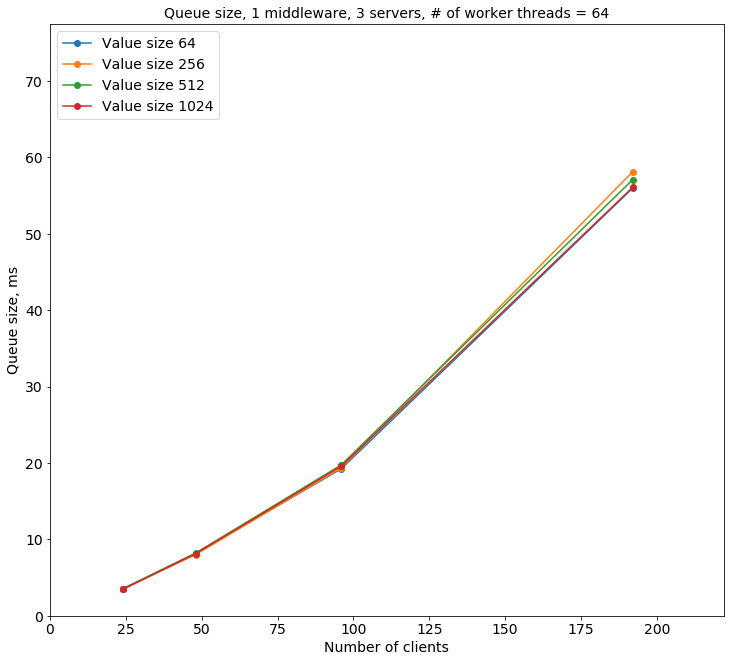

[[3.5264504112176507, 8.14133152773989, 19.236859176171876, 55.94884612428444], [3.5058764163273013, 8.002553220691112, 19.351064193935315, 58.092771292506484], [3.5334146782677784, 8.21131626285253, 19.74266057614187, 57.06983549588853], [3.4633904435140805, 8.134559277601328, 19.577142629840047, 56.04830435850477]]


In [110]:
print("Start drawing graphs")
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_TR_value_file.txt", "w")
WTR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_WTR_value_file.txt", "w")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_RT_value_file.txt", "w")
QT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_QT_value_file.txt", "w")
QS_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_QS_value_file.txt", "w")
ST_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_ST_value_file.txt", "w")
PT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_PT_value_file.txt", "w")

import numpy as np
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_mid_cl_"
X_axis = [i * 6 for i in client_numbers]
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for client_number in client_numbers:
            subset = global_data_4[(global_data_4['Worker threads'] == w) &
                                 (global_data_4['Value size'] == value_size) & 
                                 (global_data_4['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped3.groupby(['Repetition']).sum().mean()))
            for v in groupped3.groupby(['Repetition']).sum().values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            # end print to file
            
            # print to file
            WTR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped3.groupby(['Repetition']).mean().mean()))
            for v in groupped3.groupby(['Repetition']).mean().values:
                WTR_value_file.write(" " + str(v))
            WTR_value_file.write("\n")
            # end print to file
            
            
            # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped1['Time5'] / groupped1['Successful'] / 1000000.0))
            for v in groupped_std.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            # end print to file
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            # print to file
            QT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped5['Time1'] / groupped5['Successful'] / 1000000.0))
            QT_value_file.write("\n")
            # end print to file

            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            # print to file
            ST_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped7['Time3'] / groupped7['Successful'] / 1000000.0))
            ST_value_file.write("\n")
            # end print to file
            
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            # print to file
            PT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped14['Time4'] / groupped14['Successful'] / 1000000.0))
            PT_value_file.write("\n")
            # end print to file
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # print to file
            QS_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped9['Queue size'] / groupped9['Successful']))
            QS_value_file.write("\n")
            # end print to file
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        
    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 middleware, 3 servers, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()
    print(TR_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.show()
    print(RT_overall)

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(QT_overall)):
        plt.plot(X_axis, QT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(QT_overall[i]) + max(QT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 3, 1))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Queue time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(QT_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Service time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(ST_overall)):
        plt.plot(X_axis, ST_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(ST_overall[i]) + max(ST_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1, 0.2))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Service time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_st.pdf")
    plt.show()
    print(ST_overall)
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Process time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(PT_overall)):
        plt.plot(X_axis, PT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(PT_overall[i]) + max(PT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 0.2))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Process time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.show()
    print(PT_overall)
    
    
    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Queue size, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(QS_overall)):
        plt.plot(X_axis, QS_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(QS_overall[i]) + max(QS_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.yticks(np.arange(0, max1 + 2, 10))
    plt.xlim(0, max(X_axis) + 30)
    plt.xticks(np.arange(0, max(X_axis) + 30, 25))
    plt.ylabel('Queue size, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_qs.pdf")
    plt.show()
    print(QS_overall)
    
TR_value_file.close()
RT_value_file.close()
QS_value_file.close()
QT_value_file.close()
ST_value_file.close()
PT_value_file.close()
WTR_value_file.close()

Start drawing graphs


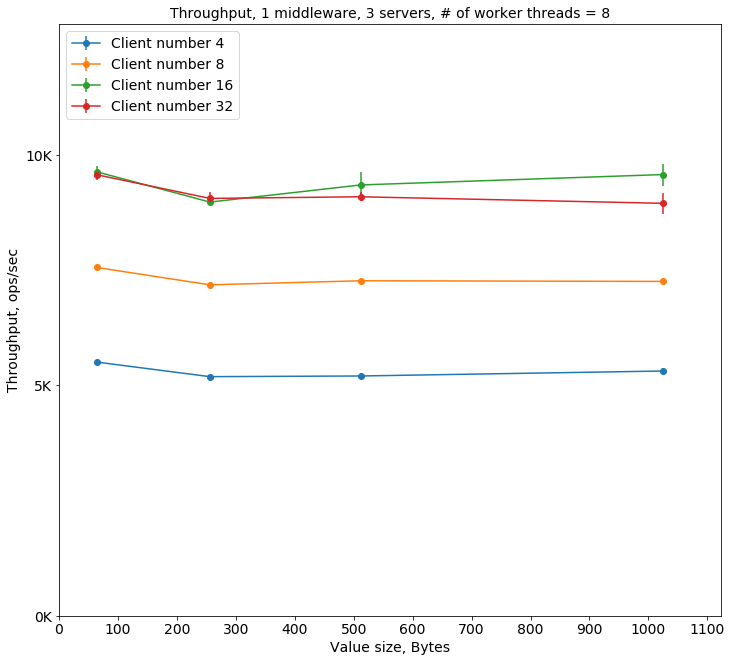

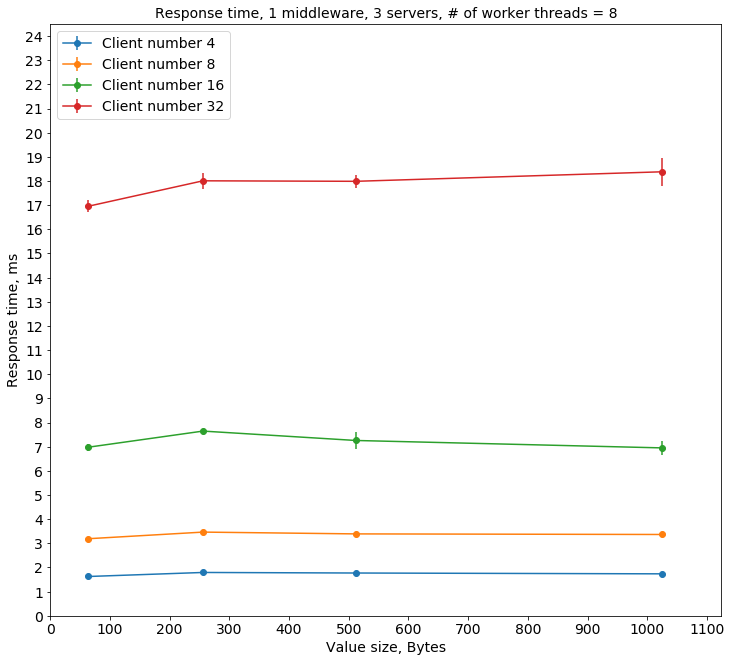

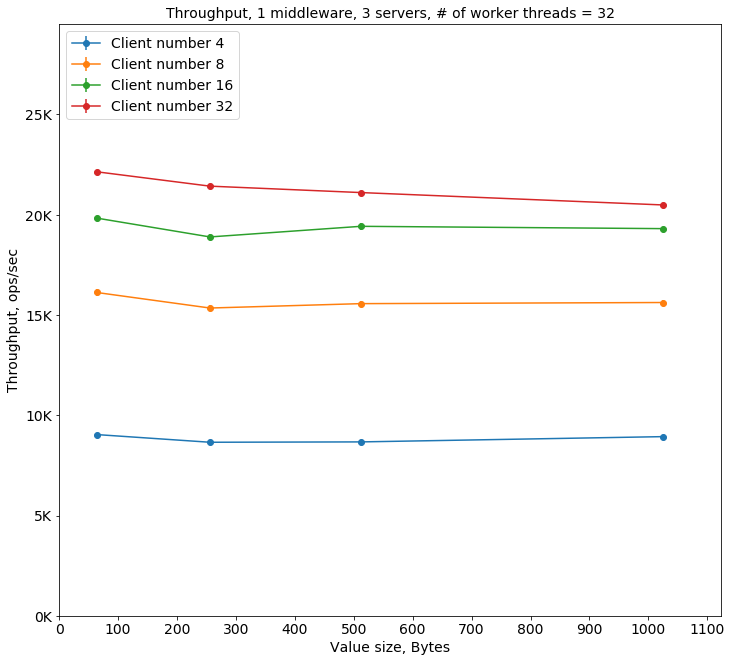

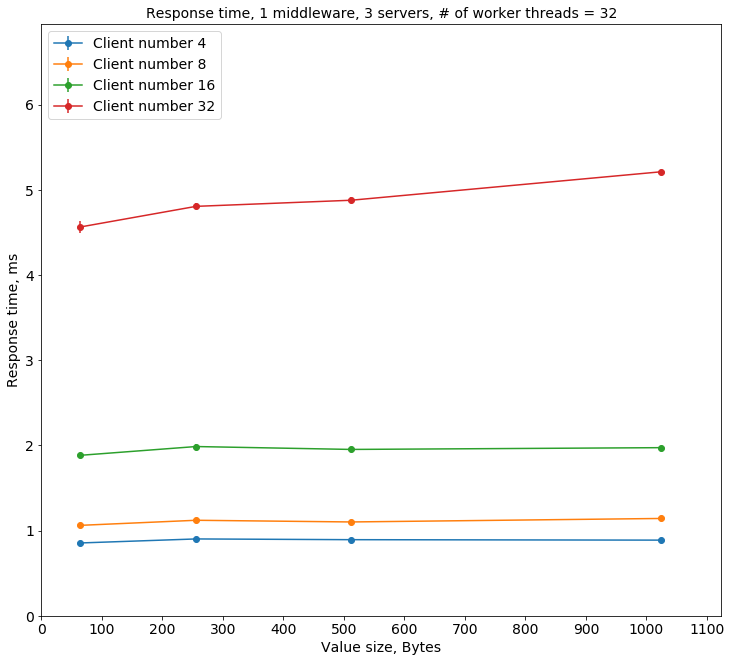

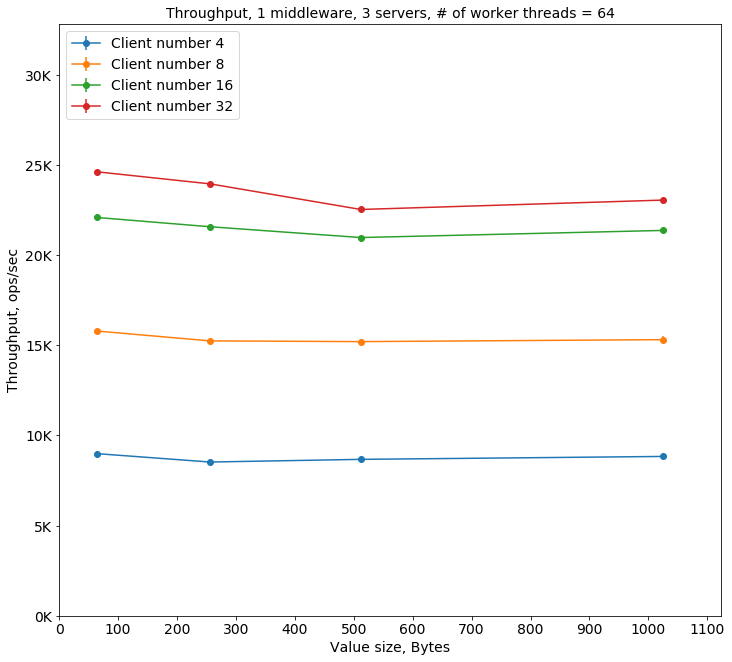

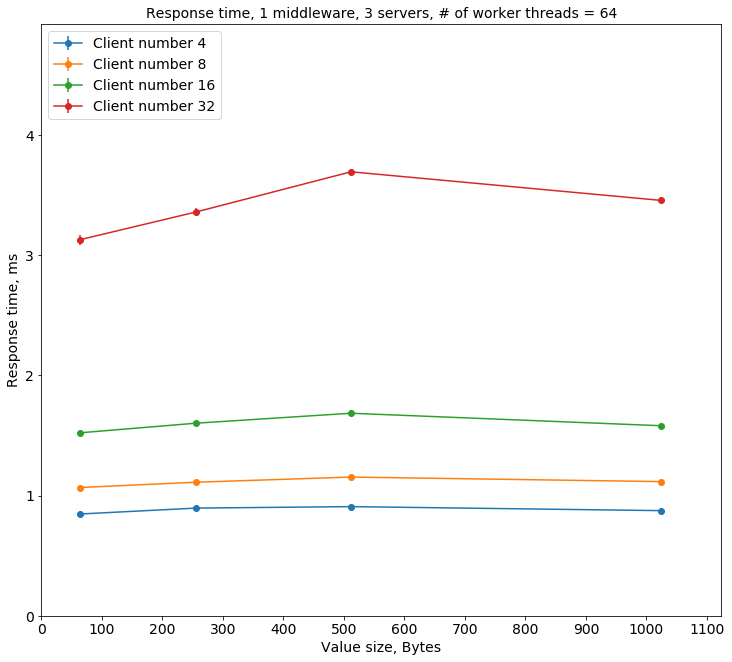

In [111]:
print("Start drawing graphs")
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_mid_vl_"
X_axis = value_sizes
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    
    TR_error_overall = []
    RT_error_overall = []
    for client_number in client_numbers:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        for value_size in value_sizes:
            subset = global_data_4[(global_data_4['Worker threads'] == w) &
                                 (global_data_4['Value size'] == value_size) & 
                                 (global_data_4['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            groupped_std = groupped0['Time5'] / groupped0['Successful'] / 1000000.0
            RT_std = np.std(groupped_std.values)
            RT_error.append(RT_std)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            TR_std = np.std(groupped3.groupby(['Repetition']).sum().values)
            TR_error.append(TR_std)
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        
    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 middleware, 3 servers, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 5000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Value size, Bytes')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_tr.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 1 middleware, 3 servers, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Client number "+str(client_numbers[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.xlim(0, max(X_axis) + 100)
    plt.xticks(np.arange(0, max(X_axis) + 100, 100))
    plt.yticks(np.arange(0, max1, 1))
    plt.ylabel('Response time, ms')
    plt.xlabel('Value size, Bytes') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w) + "_rt.pdf")
    plt.show()


## Client part

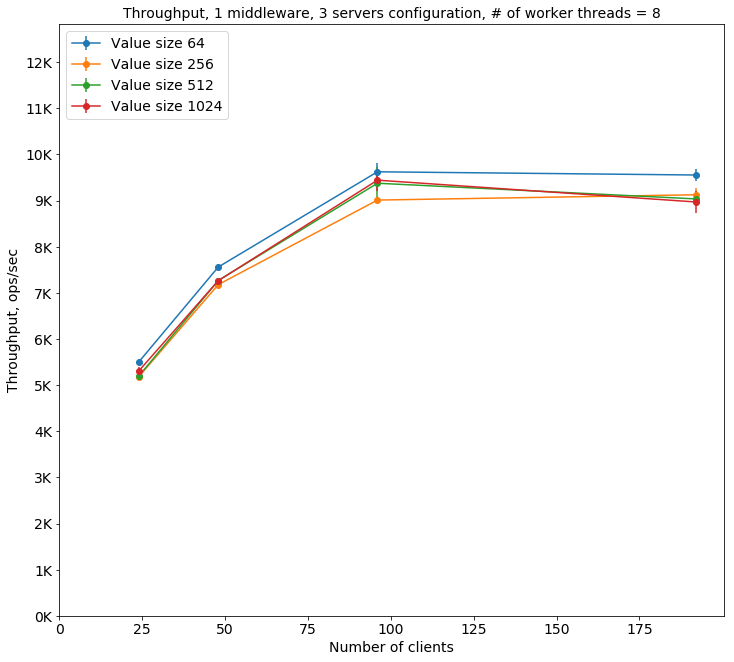

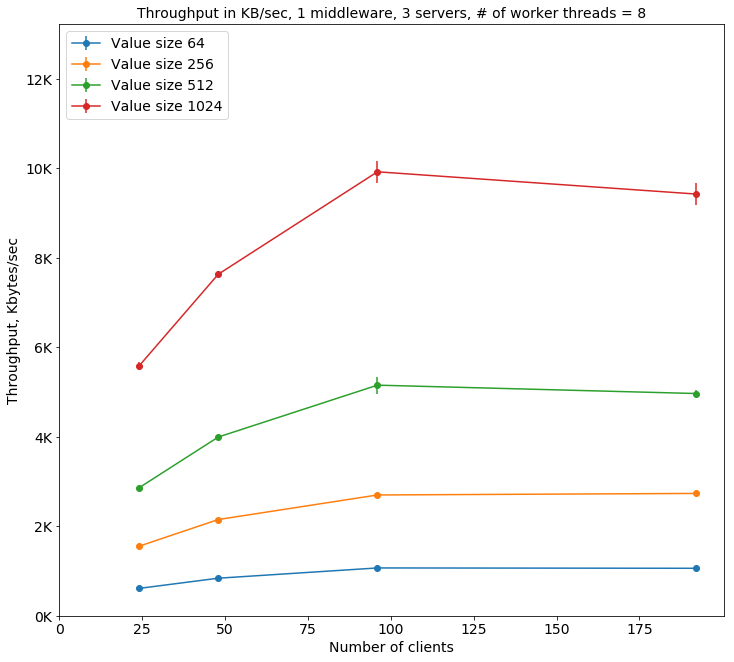

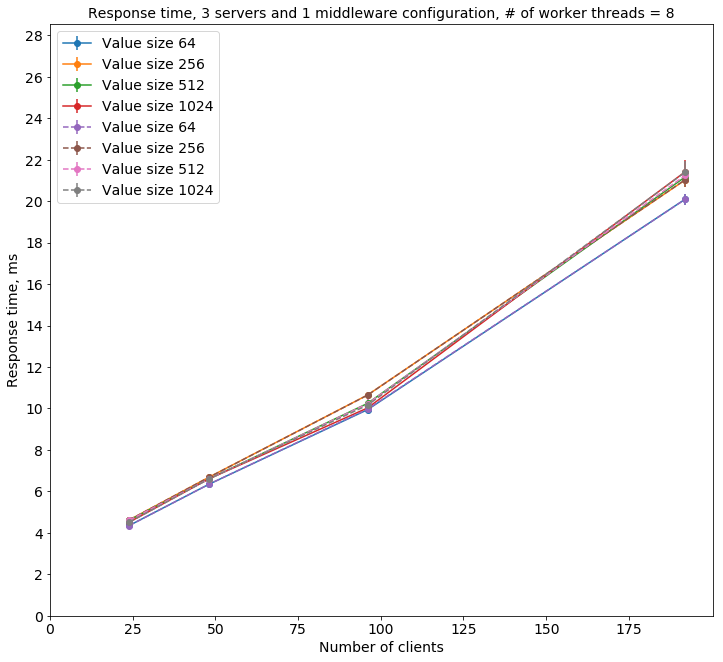

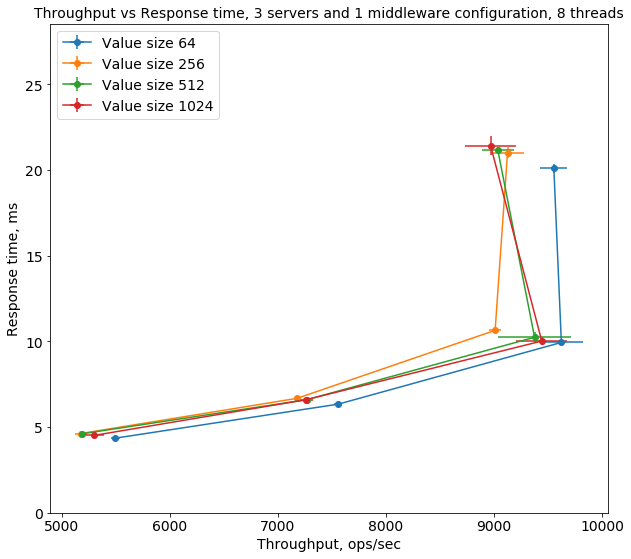

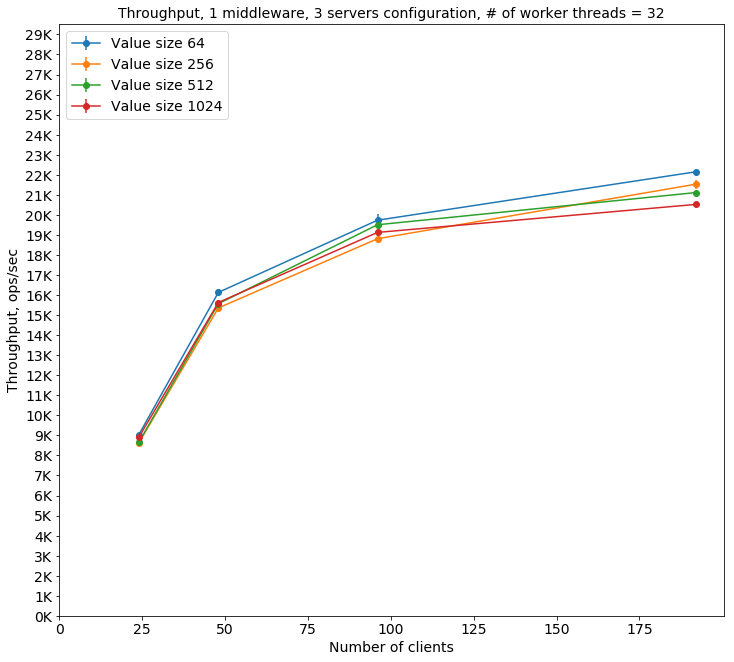

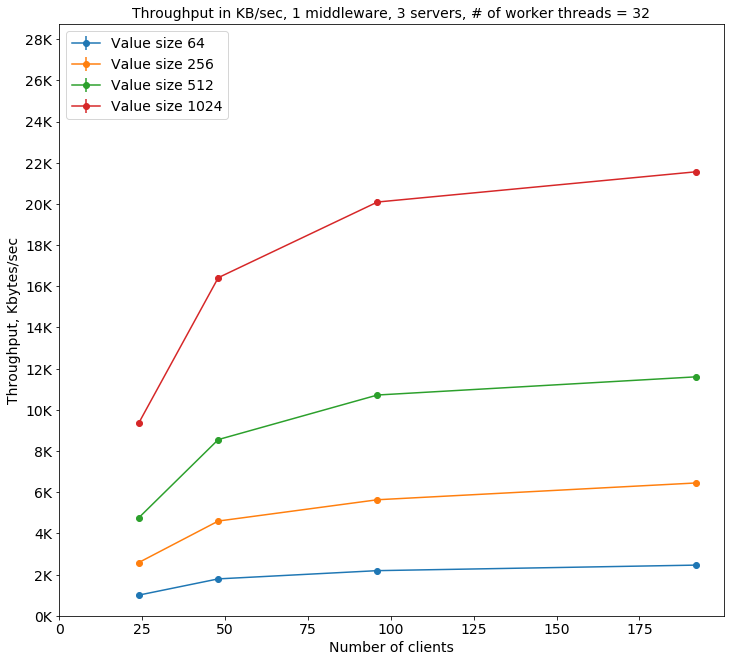

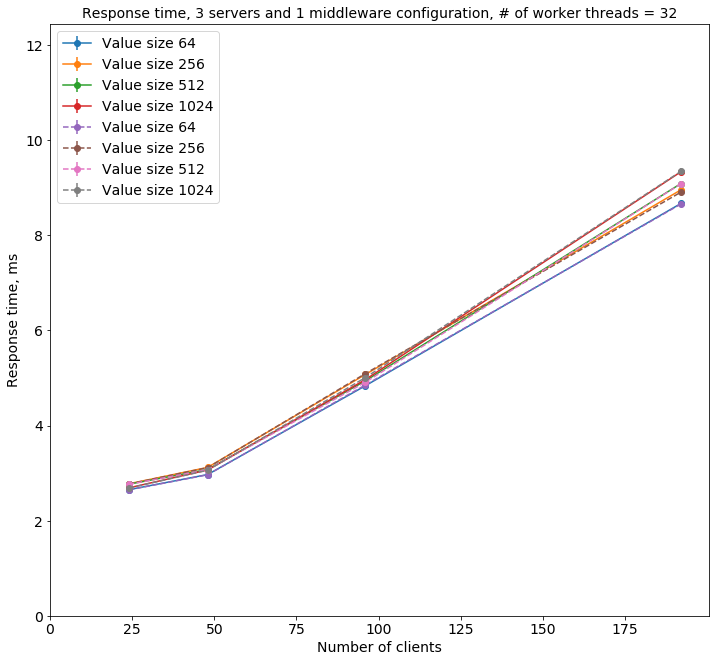

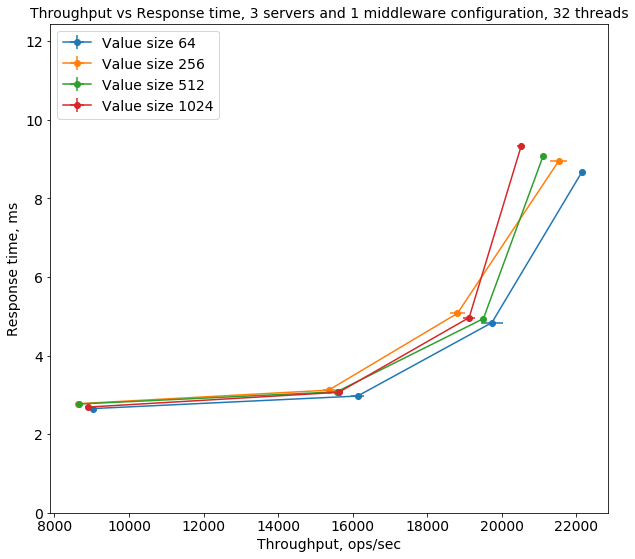

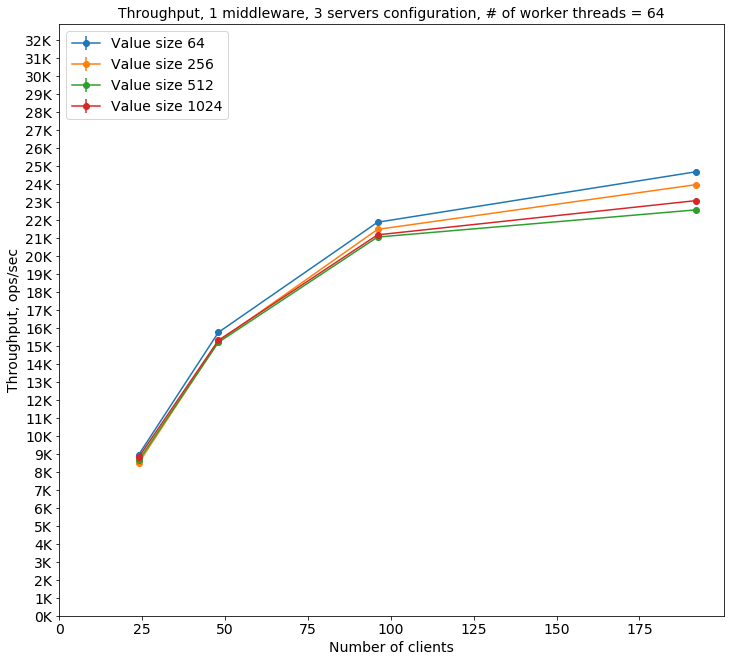

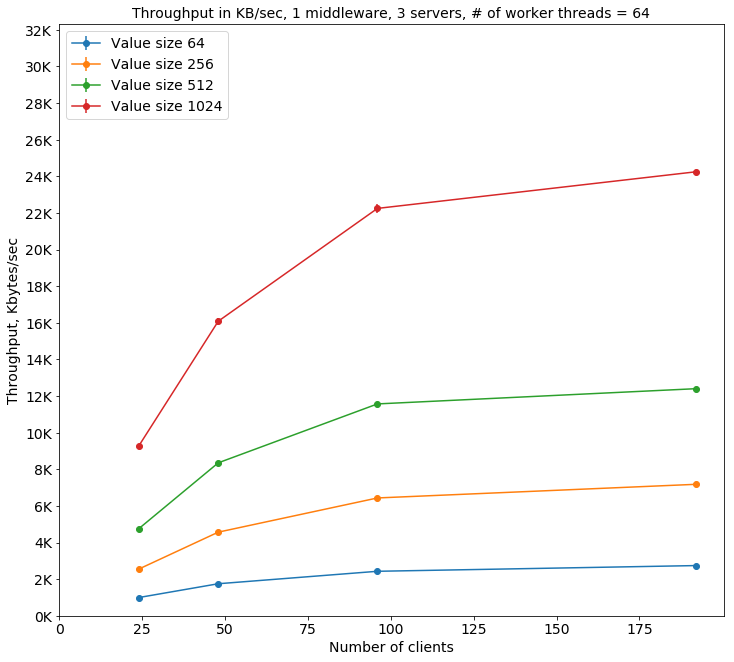

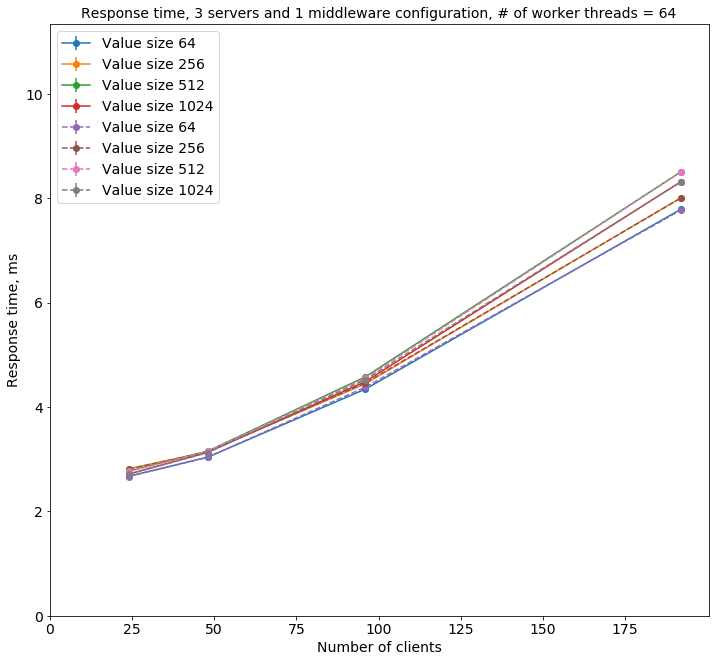

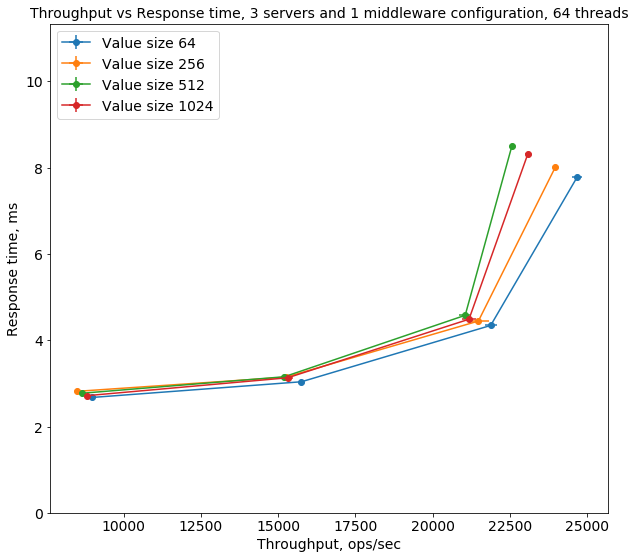

In [112]:
TR_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_TR_value_file.txt", "w+")
RT_value_file = open("/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_cl_RT_value_file.txt", "w+")


path_to_experiment="/home/anastasiia/final_ex/final_copy/part4/"
prefix="/home/anastasiia/asl-project-2019-ruzhanskaia/report_src/part4_mid_cl_cl_"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], parts[5], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'TR_B', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2], clients_data[memtier * experiments + k][3]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['TR_B'] = global_data['TR_B'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_B_overall = []
    TR_error_overall = []
    RT_error_overall = []
    TR_B_error_overall = []
    RT_overall_with_formula = []
    for value_size in value_sizes:
        TR = []
        RT = []
        TR_B = []
        TR_error = []
        RT_error = []
        TR_B_error = []

        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            # print to file
            TR_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped.mean()['TR']))
            for v in groupped['TR'].values:
                TR_value_file.write(" " + str(v))
            TR_value_file.write("\n")
            
            # end print to file
            
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
             # print to file
            RT_value_file.write(str(w) + " " + str(value_size) + " " + str(client_number) + 
                                " " + str(groupped2.mean()))
            for v in groupped2.values:
                RT_value_file.write(" " + str(v))
            RT_value_file.write("\n")
            
            # end print to file
            groupped3 = subset.groupby(['Repetition']).sum()
            TR_B.append(float(groupped3.mean()['TR_B']))
            TR_std = np.std(groupped['TR_B'].values)
            TR_B_error.append(TR_std)
            
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_B_overall.append(TR_B)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)
        TR_B_error_overall.append(TR_B_error)
        RT_overall_with_formula.append([(1/t) * 1000 * c - 0.01 for t, c in zip(TR, X_axis)])


    from matplotlib.ticker import FuncFormatter
    def kilo(x, pos):
        return '%1.fK' % (x*1e-3)
    formatter = FuncFormatter(kilo)
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput, 1 middleware, 3 servers configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_tr.pdf")
    plt.show()
    
    plt.figure(figsize=(10, 9))
    plt.axes().yaxis.set_major_formatter(formatter)
    plt.title("Throughput in KB/sec, 1 middleware, 3 servers, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_B_overall)):
        plt.errorbar(X_axis, TR_B_overall[i],
                yerr=TR_B_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_B_overall[i]) + max(TR_B_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2000))
    plt.ylabel('Throughput, Kbytes/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_tr_b.pdf")
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Response time, 3 servers and 1 middleware configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    for i in range(len(RT_overall_with_formula)):
        plt.errorbar(X_axis, RT_overall_with_formula[i],
                yerr=RT_error_overall[i],
                fmt='--o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.tight_layout(0)
    plt.savefig(prefix + str(w)+"_rt.pdf") 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 9))
    plt.title("Throughput vs Response time, 3 servers and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/3
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.show()
TR_value_file.close()
RT_value_file.close()
        